# Goal

- Predict file format


In [73]:
import pandas as pd
import numpy as np
import toolbox # my own little package I made to help with curation work

import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("./data/cleaned-data-20231031.csv", low_memory=False)
df = df.loc[
    :,
    [
        "id",
        "type",
        "PORTAL",
        "name",
        "fileFormat",
        "study",
        "assay",
        "dataType",
        "dataSubtype",
        "resourceType",
    ],
]

df = df[df["type"] != "folder"]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551522 entries, 0 to 583176
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            551522 non-null  object
 1   type          551187 non-null  object
 2   PORTAL        551522 non-null  object
 3   name          551522 non-null  object
 4   fileFormat    539149 non-null  object
 5   study         511430 non-null  object
 6   assay         370700 non-null  object
 7   dataType      332736 non-null  object
 8   dataSubtype   237060 non-null  object
 9   resourceType  301892 non-null  object
dtypes: object(10)
memory usage: 46.3+ MB


In [75]:
df_full = df.dropna(how="any")
df_full = df_full[
    df_full["assay"].fillna("").str.split(",").apply(lambda x: len(x)) == 1
]  # keeping only one assay per file for now
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186229 entries, 468 to 582765
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            186229 non-null  object
 1   type          186229 non-null  object
 2   PORTAL        186229 non-null  object
 3   name          186229 non-null  object
 4   fileFormat    186229 non-null  object
 5   study         186229 non-null  object
 6   assay         186229 non-null  object
 7   dataType      186229 non-null  object
 8   dataSubtype   186229 non-null  object
 9   resourceType  186229 non-null  object
dtypes: object(10)
memory usage: 15.6+ MB


In [76]:
df_full.head(10)

,id,type,PORTAL,name,fileFormat,study,assay,dataType,dataSubtype,resourceType
468,syn47095674,file,ad,29511_CN.FCHMLGJDSX2_L1_ITGCGGCGT-CCTCGGTA.bam,BAM,AMP-AD_DiverseCohorts,RNA-seq assay,geneExpression,raw,experimentalData
469,syn47095686,file,ad,29511_CN.FCHMLGJDSX2_L1_ITGCGGCGT-CCTCGGTA.bam...,BAI,AMP-AD_DiverseCohorts,RNA-seq assay,geneExpression,raw,experimentalData
470,syn47095808,file,ad,29511_CN.FCHMLGJDSX2_L2_ITGCGGCGT-CCTCGGTA.bam,BAM,AMP-AD_DiverseCohorts,RNA-seq assay,geneExpression,raw,experimentalData
471,syn47095820,file,ad,29511_CN.FCHMLGJDSX2_L2_ITGCGGCGT-CCTCGGTA.bam...,BAI,AMP-AD_DiverseCohorts,RNA-seq assay,geneExpression,raw,experimentalData
472,syn47095955,file,ad,29511_CN.FCHMLGJDSX2_L3_ITGCGGCGT-CCTCGGTA.bam,BAM,AMP-AD_DiverseCohorts,RNA-seq assay,geneExpression,raw,experimentalData
...,...,...,...,...,...,...,...,...,...,...
582749,syn26347224,file,psychencode,mi2015_896_r_S3_R1_001.fastq.gz,gz,BrainGVEX,miRNA-seq assay,geneExpression,raw,experimentalData
582750,syn26347226,file,psychencode,mi2015_1453_r_S17_R1_001.fastq.gz,gz,BrainGVEX,miRNA-seq assay,geneExpression,raw,experimentalData
582751,syn26347228,file,psychencode,mi2015_918_S14_R1_001.fastq.gz,gz,BrainGVEX,miRNA-seq assay,geneExpression,raw,experimentalData
582759,syn26453724,file,psychencode,SL424495_GSLv5-8_i7_45.merge.fastq.gz,gz,BrainTF,ChIP-seq assay,chromatinActivity,raw,experimentalData


In [77]:
assays = list(df_full["assay"].value_counts()[:20].reset_index()["index"])
assays

['RNA-seq assay',
 'whole genome sequencing assay',
 'methylation array',
 'TMT quantitation assay',
 'single-nucleus RNA sequencing assay',
 'whole exome sequencing assay',
 'single-cell RNA sequencing assay',
 'ChIP-seq assay',
 'ATAC-seq assay',
 'conventional MRI',
 'cell viability assay',
 'single-cell whole genome sequencing assay',
 'western blot assay',
 'single-nucleus ATAC-seq assay',
 'immunofluorescence',
 '3D microtissue viability',
 '16SrRNA-seq assay',
 'immunohistochemistry',
 'brightfield microscopy assay',
 '10x multiome']

In [78]:
df_full["study"].value_counts()[:20]

ROSMAP                                                                                            33315
AMP-AD_DiverseCohorts                                                                             18259
MIT_ROSMAP_Multiomics                                                                             13578
rnaSeqReprocessing                                                                                12318
The Johns Hopkins NF1 biospecimen repository                                                      11635
SV_xQTL                                                                                           10569
LBP                                                                                                7840
SEA-AD                                                                                             6378
MSBB                                                                                               6321
VirusResilience_Mayo.MSBB.ROSMAP                                

| study                                        |   count |   proportion |
|:---------------------------------------------|--------:|-------------:|
| ROSMAP                                       |   33315 |       17.889 |
| AMP-AD_DiverseCohorts                        |   18259 |        9.805 |
| MIT_ROSMAP_Multiomics                        |   13578 |        7.291 |
| rnaSeqReprocessing                           |   12318 |        6.614 |
| The Johns Hopkins NF1 biospecimen repository |   11635 |        6.248 |
| SV_xQTL                                      |   10569 |        5.675 |


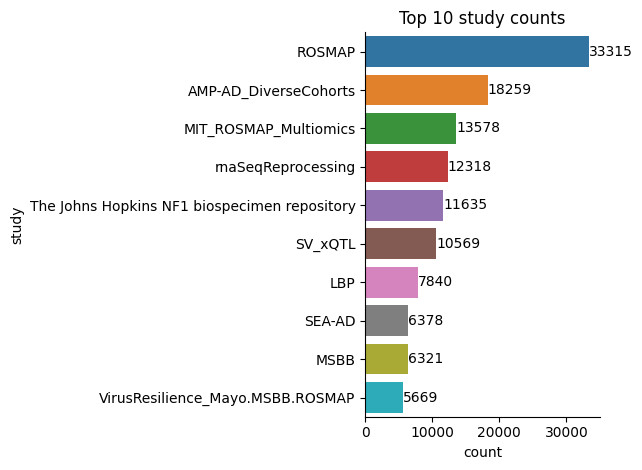

In [90]:
# study
study_temp = df_full.groupby(
    ['study'])['name'].count().reset_index().rename(columns={'name': 'count'})
study_temp['proportion'] = round(study_temp['count'] / study_temp['count'].sum()*100,3)

print(study_temp[study_temp['proportion'] > 5].sort_values(by='proportion', ascending = False).to_markdown(index = False))

ax = sns.barplot(
    data = study_temp.sort_values(by='count', ascending=False)[:10], 
    x = 'count',
    y =  'study',
    hue = 'study'
)

ax.set(title='Top 10 study counts')

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig("./imgs/study-counts.jpg")

In [79]:
fileformats = list(df_full["fileFormat"].value_counts()[
                   :20].reset_index()['index'])

In [80]:
temp = df_full.groupby(
    ['assay', 'fileFormat'])['name'].count().reset_index().rename(columns={'name': 'count'})

In [81]:
temp['countLog'] =  np.log10(temp['count'])

In [82]:
temp2 = df_full.groupby(
    ['fileFormat'])['name'].count().reset_index().rename(columns={'name': 'count'})

temp2['proportion'] = temp2['count'] / temp2['count'].sum()*100

temp2

,fileFormat,count,proportion
0,7z,2,0.001074
1,BAI,6777,3.639068
2,BAM,17852,9.586047
3,BED,47,0.025238
4,CHP,23,0.012350
...,...,...,...
98,unr,1,0.000537
99,var,5,0.002685
100,xlsb,4,0.002148
101,xlsx,557,0.299094


In [83]:
print(temp2[temp2['proportion'] > 10].to_markdown())

|    | fileFormat   |   count |   proportion |
|---:|:-------------|--------:|-------------:|
| 64 | gz           |   83349 |      44.7562 |


In [84]:
temp3 = df_full.groupby(
    ['assay'])['name'].count().reset_index().rename(columns={'name': 'count'})
temp3['proportion'] = round(temp3['count'] / temp3['count'].sum()*100,3)

print(temp3[temp3['proportion'] > 5].sort_values(by='proportion', ascending = False).to_markdown(index = False))

| assay                         |   count |   proportion |
|:------------------------------|--------:|-------------:|
| RNA-seq assay                 |   71820 |       38.565 |
| whole genome sequencing assay |   31878 |       17.118 |
| methylation array             |   23561 |       12.652 |


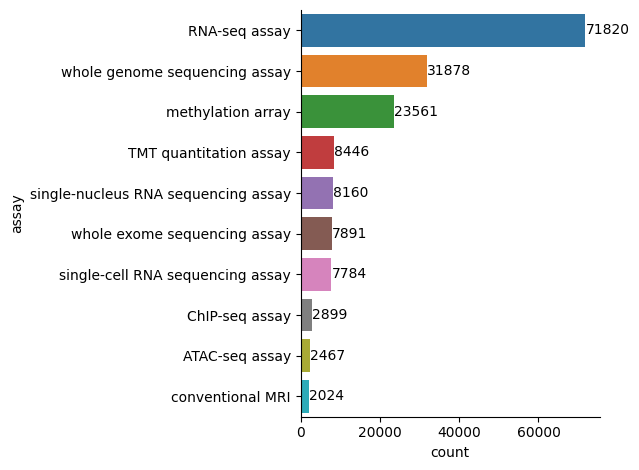

In [85]:
ax = sns.barplot(
    data = temp3.sort_values(by='count', ascending=False)[:10], 
    x = 'count',
    y =  'assay',
    hue = 'assay'
)

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig("./imgs/assay-counts.jpg")

In [86]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('file formats'),
    dcc.Dropdown(
        id="dropdown",
        options=list(temp['assay'].unique()),
        value="immunofluorescence",
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
    
def update_bar_chart(assay):
    # temp = px.data.tips()  # replace with your own data source
    mask = temp["assay"] == assay
    fig = px.bar(temp[mask], x="countLog", y="fileFormat",
                 color="assay", barmode="group")
    return fig


app.run_server(debug=True)

| dataType        |   count |   proportion |
|:----------------|--------:|-------------:|
| geneExpression  |   83176 |       44.663 |
| genomicVariants |   35803 |       19.225 |
| epigenetics     |   29173 |       15.665 |
| image           |   13441 |        7.217 |
| proteomics      |    9521 |        5.113 |


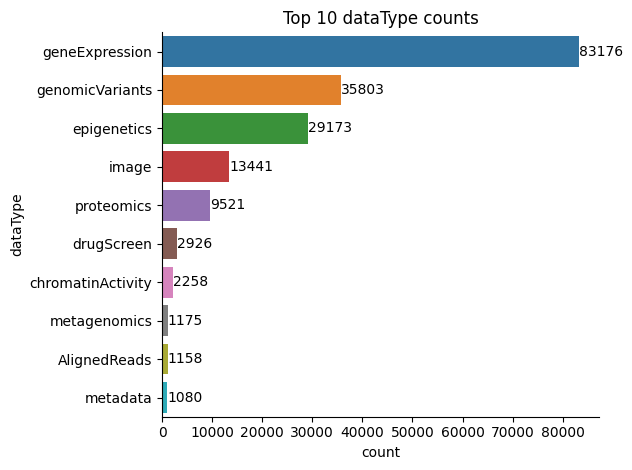

In [87]:
# dataType
temp4 = df_full.groupby(
    ['dataType'])['name'].count().reset_index().rename(columns={'name': 'count'})
temp4['proportion'] = round(temp4['count'] / temp4['count'].sum()*100,3)

print(temp4[temp4['proportion'] > 5].sort_values(by='proportion', ascending = False).to_markdown(index = False))

ax = sns.barplot(
    data = temp4.sort_values(by='count', ascending=False)[:10], 
    x = 'count',
    y =  'dataType',
    hue = 'dataType'
)

ax.set(title='Top 10 dataType counts')

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig("./imgs/dataType-counts.jpg")

| dataSubtype   |   count |   proportion |
|:--------------|--------:|-------------:|
| raw           |  124908 |       67.072 |
| processed     |   51846 |       27.84  |


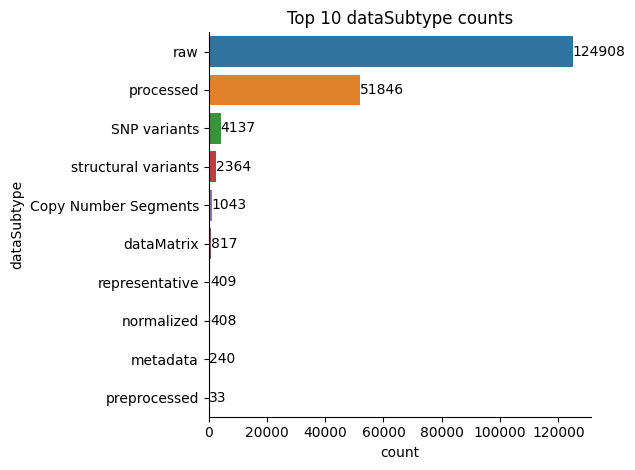

In [88]:
# dataSubtype
temp5 = df_full.groupby(
    ['dataSubtype'])['name'].count().reset_index().rename(columns={'name': 'count'})
temp5['proportion'] = round(temp5['count'] / temp5['count'].sum()*100,3)

print(temp5[temp5['proportion'] > 5].sort_values(by='proportion', ascending = False).to_markdown(index = False))

ax = sns.barplot(
    data = temp5.sort_values(by='count', ascending=False)[:10], 
    x = 'count',
    y =  'dataSubtype',
    hue = 'dataSubtype'
)

ax.set(title='Top 10 dataSubtype counts')

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig("./imgs/dataSubtype-counts.jpg")

| resourceType     |   count |   proportion |
|:-----------------|--------:|-------------:|
| experimentalData |  162252 |       87.125 |
| analysis         |   15687 |        8.424 |


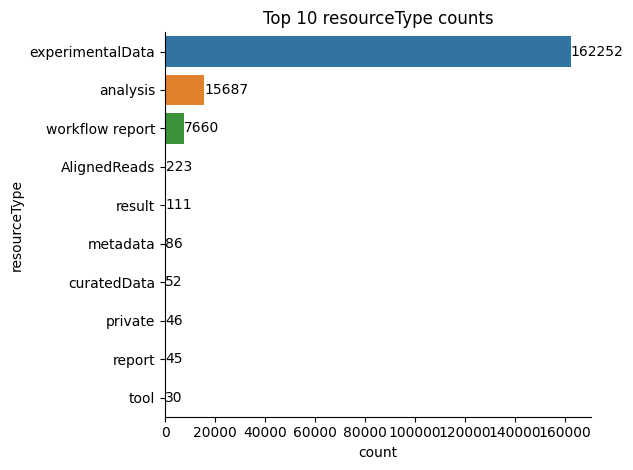

In [89]:
# resourceType
temp6 = df_full.groupby(
    ['resourceType'])['name'].count().reset_index().rename(columns={'name': 'count'})
temp6['proportion'] = round(temp6['count'] / temp6['count'].sum()*100,3)

print(temp6[temp6['proportion'] > 5].sort_values(by='proportion', ascending = False).to_markdown(index = False))

ax = sns.barplot(
    data = temp6.sort_values(by='count', ascending=False)[:10], 
    x = 'count',
    y =  'resourceType',
    hue = 'resourceType'
)

ax.set(title='Top 10 resourceType counts')

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig("./imgs/resourceType-counts.jpg")